In [12]:
#Ethanol and its mixtures with water - Determination of the density and alcoholic strength - Glass densimeter method
#ABNT NBR 5992 - 17.12.2008
def EtOH_Dens(xm,T):
  # Alcoholic curve with reference temperature = 20°C
  Tr = 20

  #Coefficients of Bettin e Spieweck (1990)
  A =[913.76673,-221.75948,-59.61786,146.82019,-566.5175,621.18006,3782.4439,-9745.3133,-9573.4653,32677.808,8763.7383,-39026.437]

  B =[-0.794376,-0.001217,3.5017833e-6,1.770944e-7,-3.4138828e-9,-9.9880242e-11]

  C =[[-0.39158709, -0.000120832, -3.8683211e-5, -5.6024906e-7, -1.444174e-8],
  [1.1518337, -0.005746625, -0.000209114, -1.2649169e-6, 1.3470542e-8],
  [-5.0416999, 0.12030894, 0.002671389, 3.486395e-6, 0],
  [13.381608, -0.23519694, 0.004104205, -1.5168726e-6, 0],
  [4.5899913, -1.0362738, -0.049364385, 0, 0],
  [-118.21, 2.1804505, -0.017952946, 0, 0],
  [190.5402, 4.2763108, 0.29012506, 0, 0],
  [339.81954, -6.8624848, 0.023001712, 0, 0],
  [-900.32344, -6.9384031, -0.54150139, 0, 0],
  [-349.32012, 7.4460428, 0, 0, 0],
  [1285.9318, 0, 0, 0, 0]]

  m  = [11,10,9,4,2]
  n  = 5

  #Define ranges of composition (mass percentage) and temperature (ºC)
  if (xm<0 or xm>100) & (T<-20 or T>50):
    return print('Error! The composition must be between 0 and 100 % and temperature must be between  -20 and 50 ºC')
  elif T<-20 or T>50:
    return print('Error! The temperature range must be between -20 and 50 ºC')
  elif xm<0 or xm>100:
    return print('Error! The composition range must be between 0 and 100 %')
  else:
    #print('Nice! The composition and temperature are within the ranges') 

    #Specific mass calculation
    sum1=0
    sum2=0
    sum3=0

    #Calculate the first summation (composition)
    for k in range(1, len(A)):
      sum1 += A[k]*(xm/100-0.5)**(k) #Calculate the first summation (composition)

    #Calculate the second summation (temperature)
    for k in range(0, len(B)):
      sum2 += B[k]*(T-Tr)**(k+1)

    #Calculate the third summation (composition and temperature)
    for i in range(0,n):
      for k in range(0,m[i]):
        sum3 += C[k][i]*(xm/100-0.5)**(k+1)*(T-Tr)**(i+1)

    #Calculate the specific mass
    D = A[0]+sum1+sum2+sum3
    #print("Ethanol mixture specific mass ({:.1f} %, {:.1f} ºC)= {:.2f} kg/m³".format(xm,T,D))
    return D

This is a python script that calculates the density of an ethanol mixture given the mass percentage of ethanol (xm) and the temperature (T) using the glass densimeter method, as described in ABNT NBR 5992 - 17.12.2008. The script uses the coefficients of Bettin e Spieweck (1990) to calculate the density of the mixture. The script first checks if the input values of xm and T are within the allowed ranges (between 0 and 100% for xm and between -20 and 50°C for T). If they are not, an error message is printed. If they are, the script calculates the density of the mixture using a series of mathematical equations involving summations and powers of xm and T, with the coefficients A, B, and C being used in the calculations. Finally, the script returns the density of the mixture.

In [2]:
#Calculate the volumetric composition
def EtOH_GL(xm,D):
    T  = 20
    xV = xm*D/789.23
    return xV

This is a python function that calculates the volumetric composition of an ethanol mixture given the mass percentage of ethanol (xm) and the density of the mixture (D). The function first assumes the temperature to be 20°C, as it is not passed as an argument in the function. Then, the function calculates the volumetric composition by multiplying the mass percentage by the density and dividing the result by the density of pure ethanol at 20°C (789.23 kg/m³). The function returns the calculated volumetric composition as a decimal value.

In [3]:
#Calculate the volume correction factor (VCF)
def EtOH_VCF(D,D20,T):
    VCF = D/D20*(1+3.6e-5*(T-20))
    return VCF

This is a python function that calculates the volume correction factor (VCF) of an ethanol mixture given the density of the mixture (D), the density of the mixture at 20°C (D20) and the temperature (T) of the mixture. The function uses the formula: VCF = D/D20*(1+3.6e-5*(T-20)) where VCF is the volume correction factor, D is the density of the mixture, D20 is the density of the mixture at 20°C and T is the temperature of the mixture. The function returns the calculated VCF as a decimal value. The VCF is used to correct the volume of a liquid for the effect of temperature variation. The factor is usually used for liquids other than water and air.

In [4]:
#Define xm  (mass percentage) and temperature (ºC) for example
xm = 69
T  = 48

#Calculate
D  = EtOH_Dens(xm,T)  #Specific mass at temperature T
D20= EtOH_Dens(xm,20) #Specific mass at temperature 20 ºC
GL = EtOH_GL(xm,D20)  #Volumetric percentage at 20 ºC
VCF= EtOH_VCF(D,D20,T)#Volume correction factor at temperature T

In [5]:
#Results summary
from tabulate import tabulate
results = [["Temperature (ºC)", T],
        ["Mass percentage (%)", xm], 
        ["Volume percentage (%)", GL], 
        ["Volume correction factor", VCF], 
        ["Specific mass (kg/m³)", D]]
col_names = ["Parameter", "Value"]
print(tabulate(results, headers=col_names, tablefmt="fancy_grid", stralign='left', numalign='right', floatfmt=".3f"))

╒══════════════════════════╤═════════╕
│ Parameter                │   Value │
╞══════════════════════════╪═════════╡
│ Temperature (ºC)         │  48.000 │
├──────────────────────────┼─────────┤
│ Mass percentage (%)      │  69.000 │
├──────────────────────────┼─────────┤
│ Volume percentage (%)    │  76.060 │
├──────────────────────────┼─────────┤
│ Volume correction factor │   0.973 │
├──────────────────────────┼─────────┤
│ Specific mass (kg/m³)    │ 845.368 │
╘══════════════════════════╧═════════╛


In [13]:
#graphs of specific mass
import numpy as np
import matplotlib.pyplot as plt

#Define temperature (T) and composition range (xs)
T = np.linspace(-20, 50, num=250)
xs = [0,25,50,75,100]

#Define a matrix to store the results
ds = np.zeros((len(T),len(xs)))

#Generate the specific mass (ds) for each xs and T
for i in range(0,len(xs)):
    for j in range(0,len(T)):
        ds[j][i] = EtOH_Dens(xs[i],T[j])

#Define each column of ds
dw = np.zeros(len(T))
ds25 = np.zeros(len(T))
ds50 = np.zeros(len(T))
ds75 = np.zeros(len(T))
de = np.zeros(len(T))

#Get each column of ds
for i in range(0,len(T)):
    dw[i] = ds[i][0]
    ds25[i] = ds[i][1]
    ds50[i] = ds[i][2]
    ds75[i] = ds[i][3]
    de[i] = ds[i][4]

This script is generating a graph of specific mass (density) of an ethanol mixture as a function of temperature, for different mass percentages of ethanol. The script first imports the necessary libraries (numpy and matplotlib.pyplot) to generate the graph. Then, it defines the range of temperature (T) and the mass percentages of ethanol (xs) to be used in the graph. Next, it creates a matrix to store the results of the specific mass calculation for each xs and T using the function EtOH_Dens(). It then loops through each value of xs and T to calculate the specific mass using the function EtOH_Dens() and store the results in the matrix ds. After that, it defines each column of ds as an individual array (dw, ds25, ds50, ds75, and de) and loops through each value of T to get the corresponding value of ds for each mass percentage of ethanol. Finally, the script can use this data to plot the graph of specific mass vs temperature for different mass percentages of ethanol.

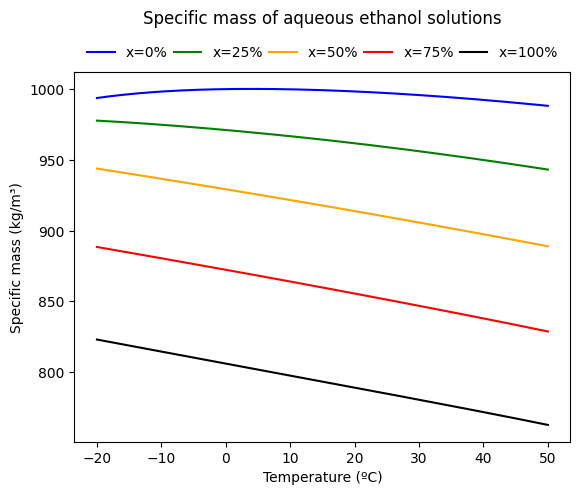

In [14]:
#plot the specific mass
plt.plot(T, dw,'-', color='blue', label = 'x=0%')
plt.plot(T, ds25,'-', color='green', label = 'x=25%')
plt.plot(T, ds50,'-', color='orange', label = 'x=50%')
plt.plot(T, ds75,'-', color='red', label = 'x=75%')
plt.plot(T, de,'-', color='black', label = 'x=100%')

#Define the plot parameters
plt.title('Specific mass of aqueous ethanol solutions', pad = 35)
plt.xlabel('Temperature (ºC)')
plt.ylabel('Specific mass (kg/m³)')
plt.legend(bbox_to_anchor=(0, 1, 1, 1), loc="lower left", mode="expand", ncol=5, frameon = False)

This script is plotting the specific mass of an ethanol mixture as a function of temperature, for different mass percentages of ethanol (0%, 25%, 50%, 75%, and 100%). The script uses the arrays dw, ds25, ds50, ds75, and de, which contain the specific mass values at different temperatures and different mass percentages of ethanol, which are generated by the previous script.
It then uses matplotlib.pyplot to plot the specific mass values for each mass percentage of ethanol as a function of temperature, with different colored lines for each mass percentage of ethanol.
The plot shows how the specific mass of the ethanol mixture changes as the mass percentage of ethanol and temperature changes.

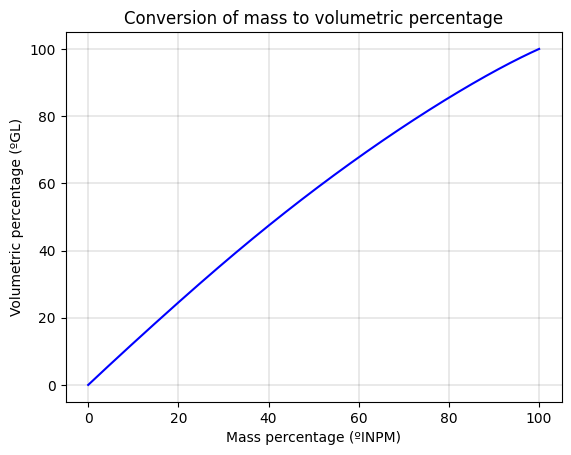

In [8]:
#calculate the specific mass at 20ºC and volumetric composition
x = np.linspace(0,100,500)
d20 = np.zeros(len(x))
xv = np.zeros(len(x))
for i in range(0,len(x)):
    d20[i] = EtOH_Dens(x[i],20)
    xv[i] = EtOH_GL(x[i],d20[i])

#Define the plot parameters  
plt.plot(x, xv,'-', color='blue')
plt.title('Conversion of mass to volumetric percentage')
plt.xlabel('Mass percentage (ºINPM)')
plt.ylabel('Volumetric percentage (ºGL)')
plt.grid(which='major', axis='both', linestyle='-', linewidth=0.125, color = 'black')

This script is generating a graph that shows the relationship between the mass percentage of ethanol (x) and the volumetric percentage of ethanol (xv) in an ethanol mixture. The script first calculates the specific mass of the mixture at 20ºC (d20) and the volumetric percentage of ethanol (xv) for each value of mass percentage of ethanol (x) using the functions EtOH_Dens() and EtOH_GL().
It then uses matplotlib.pyplot to plot the relationship between x and xv using a line plot. The script sets the plot title, x-axis label, y-axis label and gridlines.
The plot will show how the volumetric composition of the ethanol mixture changes as the mass percentage of ethanol changes.

In [9]:
#Evaluate VCF in some temperatures TVCF
Tvcf = [-20,-10,0,10,20,30,40,50]

#Define the specific mass and VCF vectors
d = np.zeros((len(x),len(Tvcf)))
vcf = np.zeros((len(x),len(Tvcf)))

#Calculate the specific mass and VCF
for j in range(0,len(Tvcf)):
    for i in range(0,len(x)):
        d[i][j] = EtOH_Dens(x[i],Tvcf[j])
        vcf[i][j] = EtOH_VCF(d[i][j],d20[i],Tvcf[j])

#Define each column of vcf
vcf_20= np.zeros(len(x))
vcf_10= np.zeros(len(x))
vcf0  = np.zeros(len(x))
vcf10 = np.zeros(len(x))
vcf20 = np.zeros(len(x))
vcf30 = np.zeros(len(x))
vcf40 = np.zeros(len(x))
vcf50 = np.zeros(len(x))

#Get each column of vcf
for i in range(0,len(x)):
    vcf_20[i]= vcf[i][0]
    vcf_10[i]= vcf[i][1]
    vcf0[i]  = vcf[i][2]
    vcf10[i] = vcf[i][3]
    vcf20[i] = vcf[i][4]
    vcf30[i] = vcf[i][5]
    vcf40[i] = vcf[i][6]
    vcf50[i] = vcf[i][7]

This script is generating the volume correction factor (VCF) of an ethanol mixture as a function of mass percentage of ethanol, for different temperatures. The script defines the temperatures (-20, -10, 0, 10, 20, 30, 40, 50) for which the VCF will be calculated (TVCF). Then it creates arrays to store the values of specific mass and VCF for each mass percentage of ethanol and temperature.
It then loops through each mass percentage of ethanol and temperature to calculate the specific mass and VCF using the functions EtOH_Dens() and EtOH_VCF().
After that, it defines each column of vcf as an individual array (vcf_20, vcf_10, vcf0, vcf10, vcf20, vcf30, vcf40, vcf50) and loops through each value of mass percentage of ethanol to get the corresponding value of vcf for each temperature.
This script is storing the data in arrays to be used later, to plot the VCF vs mass percentage of ethanol for different temperatures.

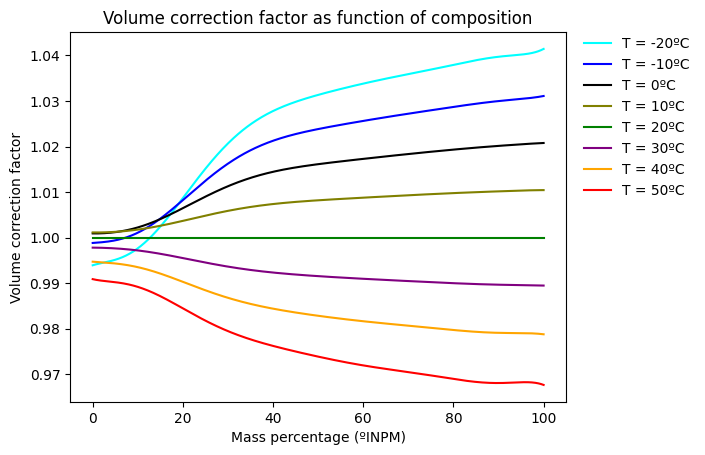

In [11]:
#plot the VCF and composition for each temperature
plt.plot(x, vcf_20,'-', color='cyan', label = 'T = -20ºC')
plt.plot(x, vcf_10,'-', color='blue', label = 'T = -10ºC')
plt.plot(x, vcf0,'-', color='black', label = 'T = 0ºC')
plt.plot(x, vcf10,'-', color='olive', label = 'T = 10ºC')
plt.plot(x, vcf20,'-', color='green', label = 'T = 20ºC')
plt.plot(x, vcf30,'-', color='purple', label = 'T = 30ºC')
plt.plot(x, vcf40,'-', color='orange', label = 'T = 40ºC')
plt.plot(x, vcf50,'-', color='red', label = 'T = 50ºC')

#Define the plot parameters
plt.title('Volume correction factor as function of composition')
plt.xlabel('Mass percentage (ºINPM)')
plt.ylabel('Volume correction factor')
plt.legend(bbox_to_anchor=( 1.275, 1.02), frameon = False)

This script is plotting the volume correction factor (VCF) as a function of mass percentage of ethanol for different temperatures (-20ºC, -10ºC, 0ºC, 10ºC, 20ºC, 30ºC, 40ºC, and 50ºC). The script uses matplotlib.pyplot to plot the VCF values for each temperature as a function of mass percentage of ethanol, with different colored lines for each temperature. It uses the arrays vcf_20, vcf_10, vcf0, vcf10, vcf20, vcf30, vcf40, vcf50 which contain the VCF values for each mass percentage of ethanol and temperature, which are generated by the previous script.
It sets the plot title, x-axis label, y-axis label and legend, with the labels indicating the temperature.
The plot shows how the VCF changes as the mass percentage of ethanol and temperature changes.
The VCF is used to correct the volume of a liquid for the effect of temperature variation.